In [9]:
import pandas as pd

results_solo_df = pd.read_csv('resources/results_solo.csv')

results_solo_with_higher_range_df = pd.read_csv('resources/results_solo_with_higher_range.csv')

results_all_params_df = pd.read_csv('resources/results_all_params.csv')

results_pairwise_df = pd.read_csv('resources/results_pairwise.csv')


In [10]:
results_pairwise_df.head()

,Parameter1,Value1,Parameter2,Value2,MSE,runtime_training,runtime_prediction
0,num.trees,1.0,mtry,1.0,2.292818e+09,0.07,0.01
1,num.trees,1.0,mtry,2.0,2.390498e+09,0.03,0.02
2,num.trees,1.0,mtry,3.0,2.157344e+09,0.03,0.03
3,num.trees,1.0,mtry,4.0,2.136587e+09,0.03,0.03
4,num.trees,1.0,mtry,5.0,2.077734e+09,0.03,0.02


## MSE for Solo-Dataframe

In [7]:
import plotly.express as px

# Create a plot for each parameter
for parameter in results_solo_with_higher_range_df['Parameter'].unique():
    # Filter the dataframe for the current parameter
    filtered_df = results_solo_with_higher_range_df[results_solo_with_higher_range_df['Parameter'] == parameter]
    
    # Create a plot
    fig = px.line(filtered_df, x='Value', y='MSE', title=f'MSE for {parameter}')
    fig.show()


## Runtime an Predictiontime for solo dataframe

In [8]:
import plotly.express as px

# Create a plot for each parameter
for parameter in results_solo_with_higher_range_df['Parameter'].unique():
    # Filter the dataframe for the current parameter
    filtered_df = results_solo_with_higher_range_df[results_solo_with_higher_range_df['Parameter'] == parameter]
    
    # Create the plot
    fig = px.line(filtered_df, x='Value', y=['runtime_training', 'runtime_prediction'], title=f'Runtime and Predictiontime for {parameter}')
    fig.show()



# Results Pairwise Tuning

In [12]:
results_pairwise_df

,Parameter1,Value1,Parameter2,Value2,MSE,runtime_training,runtime_prediction
0,num.trees,1.0,mtry,1.0,2.292818e+09,0.07,0.01
1,num.trees,1.0,mtry,2.0,2.390498e+09,0.03,0.02
2,num.trees,1.0,mtry,3.0,2.157344e+09,0.03,0.03
3,num.trees,1.0,mtry,4.0,2.136587e+09,0.03,0.03
4,num.trees,1.0,mtry,5.0,2.077734e+09,0.03,0.02
...,...,...,...,...,...,...,...
47063,min.node.size,48.0,replace,0.0,6.822260e+08,0.14,0.03
47064,min.node.size,49.0,replace,1.0,6.477304e+08,0.18,0.03
47065,min.node.size,49.0,replace,0.0,6.823668e+08,0.14,0.03
47066,min.node.size,50.0,replace,1.0,6.521683e+08,0.20,0.01


TypeError: Length of x (50) must match number of columns in z (2)

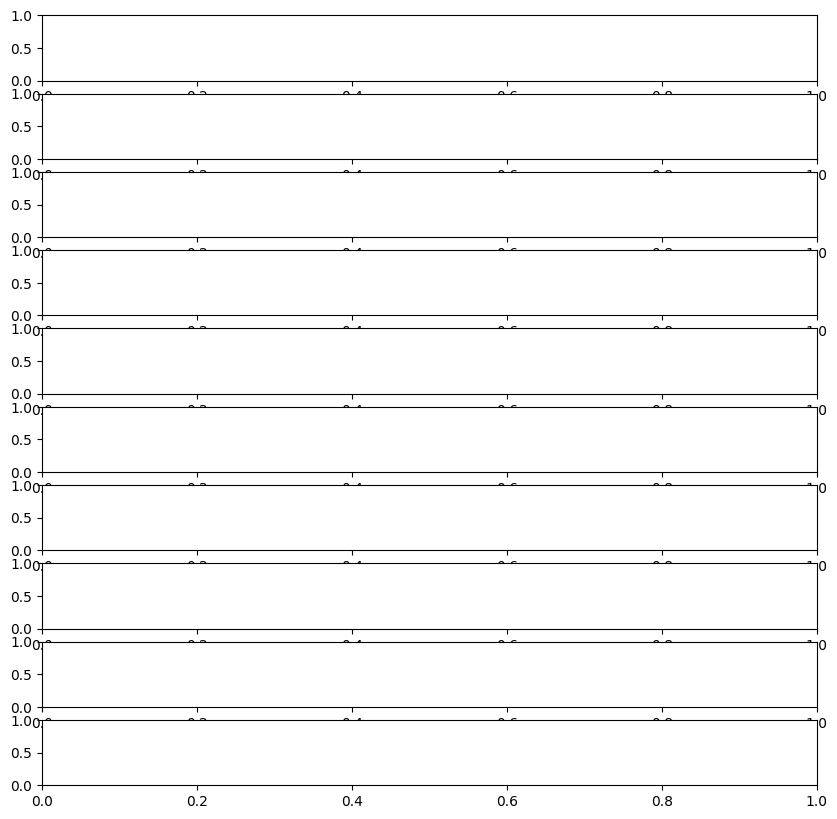

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Group the dataframe by Parameter1 and Parameter2
grouped_df = results_pairwise_df.groupby(['Parameter1', 'Parameter2'])

# Create a subplot for each group
fig, axs = plt.subplots(len(grouped_df), 1, figsize=(10, 10))

# Iterate over each group and create a plot
for i, (group, data) in enumerate(grouped_df):
    # Pivot the data so that we have one mse value for each combination of parameter1 and parameter2 values
    pivot_df = data.pivot(index='Value1', columns='Value2', values='MSE')

    # Extract the values for parameter1, parameter2, and mse
    parameter1 = pivot_df.index.values
    parameter2 = pivot_df.columns.values
    mse = pivot_df.values

    # Create a contour plot
    contour = axs[i].contourf(parameter1, parameter2, mse)
    axs[i].set_title(f'MSE for {group[0]} vs {group[1]}')
    axs[i].set_xlabel('Value1')
    axs[i].set_ylabel('Value2')
    fig.colorbar(contour, ax=axs[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Results for all Hyperparameters

In [6]:
results_all_params_df

,num.trees,mtry,sample.fraction,min.node.size,replace,MSE,runtime_training,runtime_prediction
0,2,2,0.1,1,True,1.781989e+09,0.02,0.03
1,4,2,0.1,1,True,1.334763e+09,0.06,0.03
2,8,2,0.1,1,True,1.026578e+09,0.04,0.03
3,16,2,0.1,1,True,1.005191e+09,0.03,0.01
4,32,2,0.1,1,True,1.056604e+09,0.03,0.01
...,...,...,...,...,...,...,...,...
21995,128,60,1.0,46,False,8.144227e+08,0.25,0.03
21996,256,60,1.0,46,False,8.223690e+08,0.48,0.03
21997,512,60,1.0,46,False,8.131319e+08,0.95,0.02
21998,1024,60,1.0,46,False,8.277872e+08,1.89,0.04


In [17]:
# Sample of 1000 rows 
df_sample = results_all_params_df.sample(n=1000)

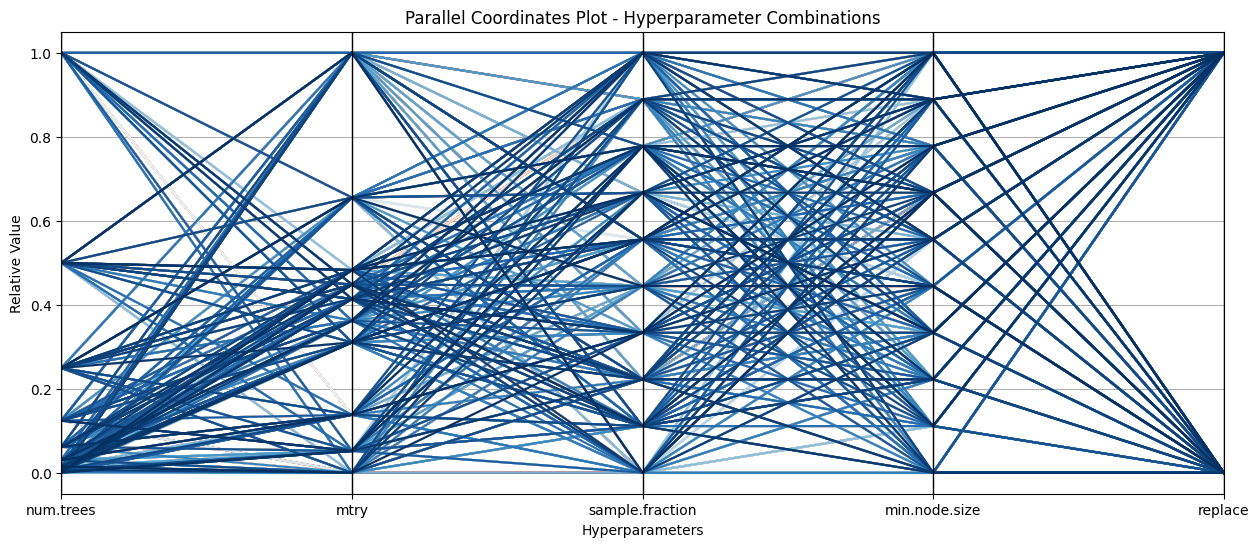

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


df = df_sample[['num.trees', 'mtry', 'sample.fraction', 'min.node.size', 'replace', 'MSE']]

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Parallel Coordinates Plot 
plt.figure(figsize=(15, 6))
pd.plotting.parallel_coordinates(df_normalized, 'MSE', colormap='RdBu')
plt.title('Parallel Coordinates Plot - Hyperparameter Combinations')
plt.xlabel('Hyperparameters')
plt.ylabel('Relative Value')
plt.legend().remove()
plt.show()
